# Stock Prediction 
## HDFC Bank 
### Using Time Series modelling 


Modeling time series using decomposition
* Method I: statsmodels library
* Method II: fbprophet library
    - Testing for stationarity
    - Modeling time series using
* Method III: Exponential smoothing
* Method IV: ARIMA
    - Modeling volatility using ARCH/GARCH

In [5]:
# Importing Library
import numpy as np
import pandas as pd
import yfinance as yf
import datetime
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose

import yfinance as yf
# import quandl
from prophet import Prophet

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
sns.set()

In [3]:
# We first try the seasonal_decompose method from the statsmodels.tsa sub-library and then experiment with the fbprophet library

In [10]:
start4 = '2010-01-01'
end4 = '2021-12-31'
ticker4 = "HDFCBANK.NS"

In [11]:
df = yf.download(ticker4, start4 , end4)

[*********************100%***********************]  1 of 1 completed


In [12]:
print(f"Downloaded {df.shape[0]} rows and {df.shape[1]} columns of {ticker4} data")

Downloaded 2960 rows and 6 columns of HDFCBANK.NS data


In [13]:
df4 = df.copy()
df4.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,170.000000,172.850006,169.255005,170.570007,155.755508,3050490
2010-01-05,171.000000,172.500000,170.500000,170.720001,155.892471,8386600
2010-01-06,171.399994,172.000000,168.809998,170.835007,155.997513,6639840
2010-01-07,176.839996,176.839996,170.160004,171.279999,156.403839,6123980
2010-01-08,171.199997,172.339996,170.100006,171.505005,156.609299,7085900


In [14]:
df4.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-24,1445.500000,1452.000000,1428.000000,1438.900024,1422.362183,2780512
2021-12-27,1428.900024,1454.000000,1422.150024,1450.800049,1434.125488,2352549
2021-12-28,1460.699951,1466.900024,1453.400024,1460.800049,1444.010498,2725339
2021-12-29,1456.050049,1461.000000,1447.400024,1453.849976,1437.140259,3834351
2021-12-30,1458.500000,1466.849976,1445.000000,1461.500000,1444.702393,3607959


<AxesSubplot:xlabel='Date'>

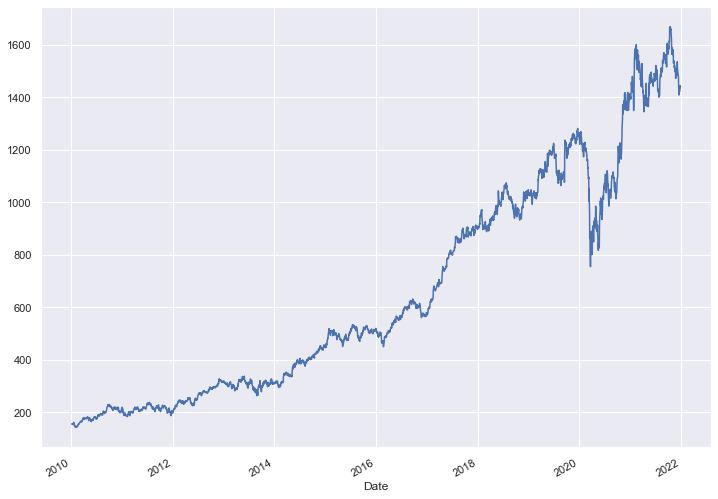

In [16]:
df4['Adj Close'].plot(figsize=(12, 9))

#### Points to note:

There are upward and downward trends in the prices. Looks linear. Needs further probing.
There seems to be seasonality and we can investigate further by looking at some moving averages

In [18]:
window_length = 21 # for 1 monthly moving average calculations
window_length2 = 252 # for annual moving average calculations

## Calculating 21-day rolling mean and volatility

df4['rolling_21d_mean'] = df4['Adj Close'].rolling(window=window_length).mean()
df4['rolling_21d_vol'] = df4['Adj Close'].rolling(window=window_length).std()


## Calculating 252-day rolling mean and volatility

df4['rolling_12m_mean'] = df4['Adj Close'].rolling(window=window_length2).mean()
df4['rolling_12m_vol'] = df4['Adj Close'].rolling(window=window_length2).std()

In [20]:
df4.tail()

,Open,High,Low,Close,Adj Close,Volume,rolling_21d_mean,rolling_21d_vol,rolling_12m_mean,rolling_12m_vol
Date,,,,,,,,,,
2021-12-24,1445.500000,1452.000000,1428.000000,1438.900024,1422.362183,2780512,1475.404971,34.443848,1488.604559,70.526230
2021-12-27,1428.900024,1454.000000,1422.150024,1450.800049,1434.125488,2352549,1473.564471,35.604439,1488.783165,70.329994
2021-12-28,1460.699951,1466.900024,1453.400024,1460.800049,1444.010498,2725339,1471.660418,36.084634,1489.152150,69.846636
2021-12-29,1456.050049,1461.000000,1447.400024,1453.849976,1437.140259,3834351,1469.791661,36.836128,1489.492114,69.380762
2021-12-30,1458.500000,1466.849976,1445.000000,1461.500000,1444.702393,3607959,1467.760515,36.994810,1489.852127,68.908563


In [26]:
df4 = df4.drop(['Close'] , axis =1)

Text(0, 0.5, 'Price -INR')

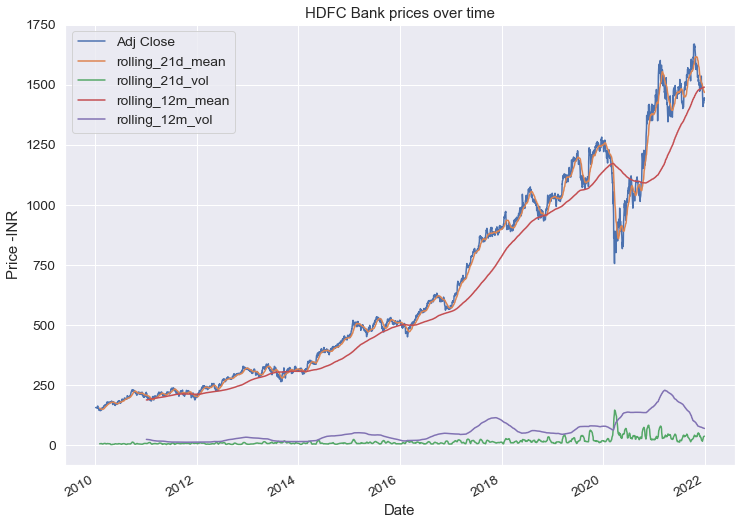

In [28]:
sns.set(font_scale=1.25)
df4.plot(figsize=(12, 9))

plt.title("HDFC Bank prices over time")
plt.xlabel("Date")
plt.ylabel("Price -INR")

Points to note:
- The yearly moving average of the prices show a linear trend (which changes roughly every couple of years).
- The monthly moving price average shows seasonality.
- The rolling volatility is time-varying in both (monthly and annual) cases.
- Let's try using the **multiplicative** model.

In [29]:
df4.shape

(2960, 5)

In [30]:
## Method I: Using statsmodels

decompose_series = seasonal_decompose(df4['Adj Close'], period=252, model="multiplicative")

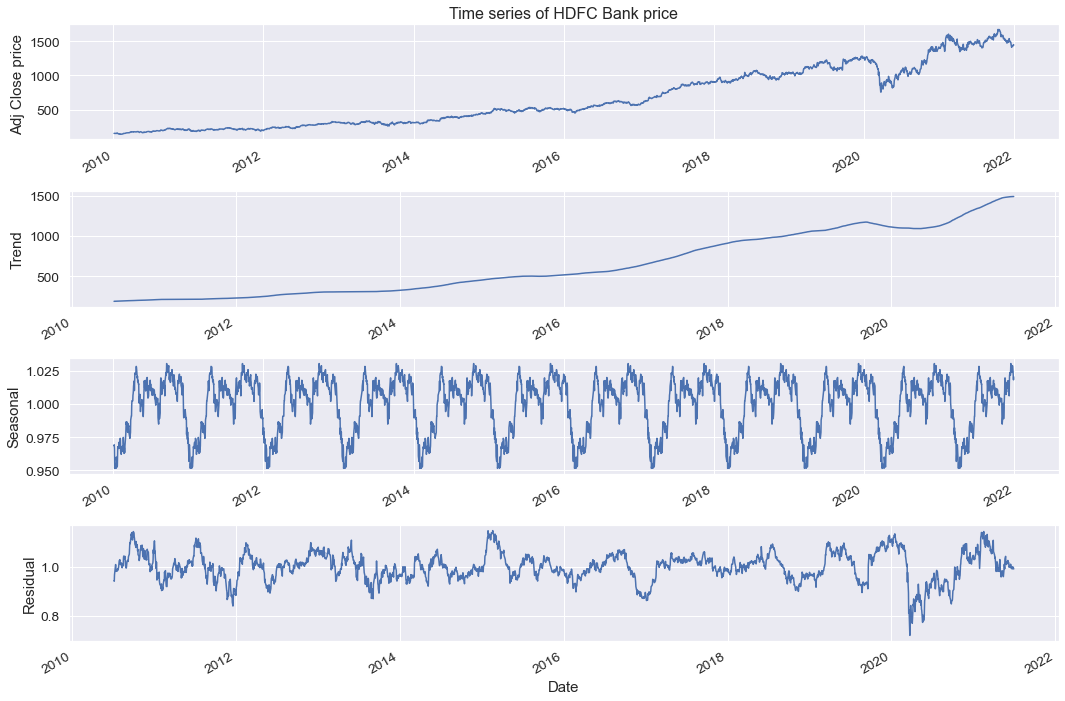

In [31]:
fig, ax = plt.subplots(4, 1, figsize=(15, 10))

decompose_series.observed.plot(ax=ax[0])
ax[0].set_title("Time series of HDFC Bank price", fontsize=16)
ax[0].set(xlabel="", ylabel="Adj Close price ")

decompose_series.trend.plot(ax=ax[1])
ax[1].set(xlabel="", ylabel="Trend")

decompose_series.seasonal.plot(ax=ax[2])
ax[2].set(xlabel="", ylabel="Seasonal")

decompose_series.resid.plot(ax=ax[3])
ax[3].set(xlabel="Date", ylabel="Residual")

plt.tight_layout()

In [32]:
decompose_series.seasonal

Date
2010-01-04    0.968555
2010-01-05    0.969220
2010-01-06    0.965983
2010-01-07    0.951491
2010-01-08    0.955085
                ...   
2021-12-24    1.028757
2021-12-27    1.024375
2021-12-28    1.019812
2021-12-29    1.018078
2021-12-30    1.020311
Name: seasonal, Length: 2960, dtype: float64

In [33]:
# Now implement this via prophet library

In [169]:
start4 = '2010-01-01'
end4 = '2022-08-01'
ticker4 = "HDFCBANK.NS"

In [170]:
df5 = yf.download(ticker4, start4 , end4)

[*********************100%***********************]  1 of 1 completed


In [171]:
df5.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,170.000000,172.850006,169.255005,170.570007,155.755493,3050490
2010-01-05,171.000000,172.500000,170.500000,170.720001,155.892487,8386600
2010-01-06,171.399994,172.000000,168.809998,170.835007,155.997528,6639840
2010-01-07,176.839996,176.839996,170.160004,171.279999,156.403839,6123980
2010-01-08,171.199997,172.339996,170.100006,171.505005,156.609299,7085900


In [172]:
df5 = df5.drop(['Open' , 'High' , 'Low' , 'Close' , 'Volume'] , axis =1)

<AxesSubplot:xlabel='Date'>

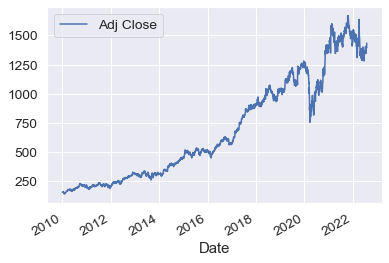

In [173]:
df5.plot()

In [174]:
## We split the data into training and test sets (this is the language of machine learning)
## In the language of econometrics, we would call them in-sample and out-of-sample
## Here, we choose data before 2019 as part of the training data set
df5 =df5.reset_index()
df5.rename(columns={'Date': 'ds', 'Adj Close': 'y'}, inplace=True)
df5.head()

,ds,y
0,2010-01-04,155.755493
1,2010-01-05,155.892487
2,2010-01-06,155.997528
3,2010-01-07,156.403839
4,2010-01-08,156.609299


In [191]:
train_index = df5['ds'].apply(lambda x: x.year) < 2022

In [192]:
train_index

0        True
1        True
2        True
3        True
4        True
        ...  
3100    False
3101    False
3102    False
3103    False
3104    False
Name: ds, Length: 3105, dtype: bool

In [193]:
df5_train = df5.loc[train_index]

In [194]:
df5_train

,ds,y
0,2010-01-04,155.755493
1,2010-01-05,155.892487
2,2010-01-06,155.997528
3,2010-01-07,156.403839
4,2010-01-08,156.609299
...,...,...
2956,2021-12-27,1434.125488
2957,2021-12-28,1444.010498
2958,2021-12-29,1437.140259
2959,2021-12-30,1444.702393


In [195]:
df5_train.isna().sum()

ds    0
y     0
dtype: int64

In [196]:
df5_train.head(), df5_train.tail()

(          ds           y
 0 2010-01-04  155.755493
 1 2010-01-05  155.892487
 2 2010-01-06  155.997528
 3 2010-01-07  156.403839
 4 2010-01-08  156.609299,
              ds            y
 2956 2021-12-27  1434.125488
 2957 2021-12-28  1444.010498
 2958 2021-12-29  1437.140259
 2959 2021-12-30  1444.702393
 2960 2021-12-31  1462.396729)

In [197]:
## Creating the test set

df5_test = df5.loc[~train_index].reset_index(drop=True)

In [198]:
df5_test

,ds,y
0,2022-01-03,1502.184082
1,2022-01-04,1510.981812
2,2022-01-05,1546.864502
3,2022-01-06,1522.053101
4,2022-01-07,1532.729004
...,...,...
139,2022-07-25,1396.599976
140,2022-07-26,1393.750000
141,2022-07-27,1404.400024
142,2022-07-28,1416.849976


In [199]:
df5.shape, df5_train.shape, df5_test.shape

((3105, 2), (2961, 2), (144, 2))

In [200]:
%%time
## Instantiating the Prophet model
## By default, it is 'additive'.
## On your own time, you can try 'multiplicative' while reviewing the material
model1 = Prophet(seasonality_mode='additive')

CPU times: total: 0 ns
Wall time: 5.98 ms


In [201]:
type(model1)

prophet.forecaster.Prophet

In [202]:
# df5.rename(columns={'Date': 'ds', 'Adj Close': 'y'}, inplace=True)

In [203]:
df5.head()

,ds,y
0,2010-01-04,155.755493
1,2010-01-05,155.892487
2,2010-01-06,155.997528
3,2010-01-07,156.403839
4,2010-01-08,156.609299


In [204]:
%%time
## Additional specification that our data has monthly seasonality
## Other arguments have been set as per the documentation
model1.add_seasonality(name='monthly', period=30.5, fourier_order=5)

## The below method is similar to the scikit-learn library's fit().
## The model is fitted using the training data specified earlier.
model1.fit(df5_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


CPU times: total: 4.88 s
Wall time: 4.9 s


In [205]:
%%time

df5_future = model1.make_future_dataframe(periods=425)
df5_pred = model1.predict(df5_future)

CPU times: total: 8.7 s
Wall time: 2.39 s


In [206]:
df5_future, df5_pred

(             ds
 0    2010-01-04
 1    2010-01-05
 2    2010-01-06
 3    2010-01-07
 4    2010-01-08
 ...         ...
 3381 2023-02-25
 3382 2023-02-26
 3383 2023-02-27
 3384 2023-02-28
 3385 2023-03-01
 
 [3386 rows x 1 columns],
              ds        trend   yhat_lower   yhat_upper  trend_lower  \
 0    2010-01-04   184.196844    78.715699   259.256352   184.196844   
 1    2010-01-05   184.295048    82.149210   260.827764   184.295048   
 2    2010-01-06   184.393253    83.181468   266.017138   184.393253   
 3    2010-01-07   184.491458    82.436369   260.918337   184.491458   
 4    2010-01-08   184.589663    89.676996   269.317736   184.589663   
 ...         ...          ...          ...          ...          ...   
 3381 2023-02-25  1762.827403  1678.088345  1892.280786  1721.041521   
 3382 2023-02-26  1763.351837  1759.518937  1963.162937  1721.422102   
 3383 2023-02-27  1763.876270  1652.160939  1854.744407  1721.802683   
 3384 2023-02-28  1764.400703  1653.459415  1852

In [207]:
df5_pred

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,monthly,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-01-04,184.196844,78.715699,259.256352,184.196844,184.196844,-13.602997,-13.602997,-13.602997,-0.250463,...,-19.234300,-19.234300,-19.234300,5.881765,5.881765,5.881765,0.0,0.0,0.0,170.593846
1,2010-01-05,184.295048,82.149210,260.827764,184.295048,184.295048,-12.571137,-12.571137,-12.571137,-0.293924,...,-18.718888,-18.718888,-18.718888,6.441675,6.441675,6.441675,0.0,0.0,0.0,171.723911
2,2010-01-06,184.393253,83.181468,266.017138,184.393253,184.393253,-13.438827,-13.438827,-13.438827,-0.693135,...,-19.721945,-19.721945,-19.721945,6.976253,6.976253,6.976253,0.0,0.0,0.0,170.954427
3,2010-01-07,184.491458,82.436369,260.918337,184.491458,184.491458,-11.522649,-11.522649,-11.522649,-1.337953,...,-17.662258,-17.662258,-17.662258,7.477562,7.477562,7.477562,0.0,0.0,0.0,172.968809
4,2010-01-08,184.589663,89.676996,269.317736,184.589663,184.589663,-11.988022,-11.988022,-11.988022,-1.685720,...,-18.241117,-18.241117,-18.241117,7.938814,7.938814,7.938814,0.0,0.0,0.0,172.601641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3381,2023-02-25,1762.827403,1678.088345,1892.280786,1721.041521,1802.785480,20.311929,20.311929,20.311929,0.331696,...,11.111793,11.111793,11.111793,8.868440,8.868440,8.868440,0.0,0.0,0.0,1783.139333
3382,2023-02-26,1763.351837,1759.518937,1963.162937,1721.422102,1803.413935,92.796243,92.796243,92.796243,2.150366,...,82.466714,82.466714,82.466714,8.179163,8.179163,8.179163,0.0,0.0,0.0,1856.148079
3383,2023-02-27,1763.876270,1652.160939,1854.744407,1721.802683,1804.042390,-9.736098,-9.736098,-9.736098,2.084794,...,-19.234300,-19.234300,-19.234300,7.413408,7.413408,7.413408,0.0,0.0,0.0,1754.140172
3384,2023-02-28,1764.400703,1653.459415,1852.716430,1722.183264,1804.670846,-12.150825,-12.150825,-12.150825,-0.005313,...,-18.718888,-18.718888,-18.718888,6.573376,6.573376,6.573376,0.0,0.0,0.0,1752.249878


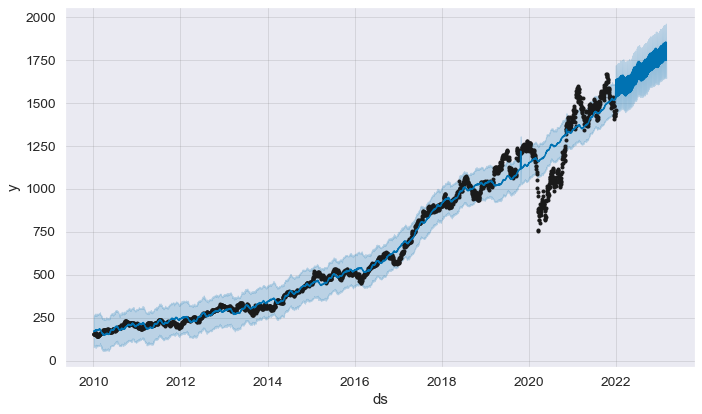

In [208]:
## Plotting the predicted values on test and training data

model1.plot(df5_pred);

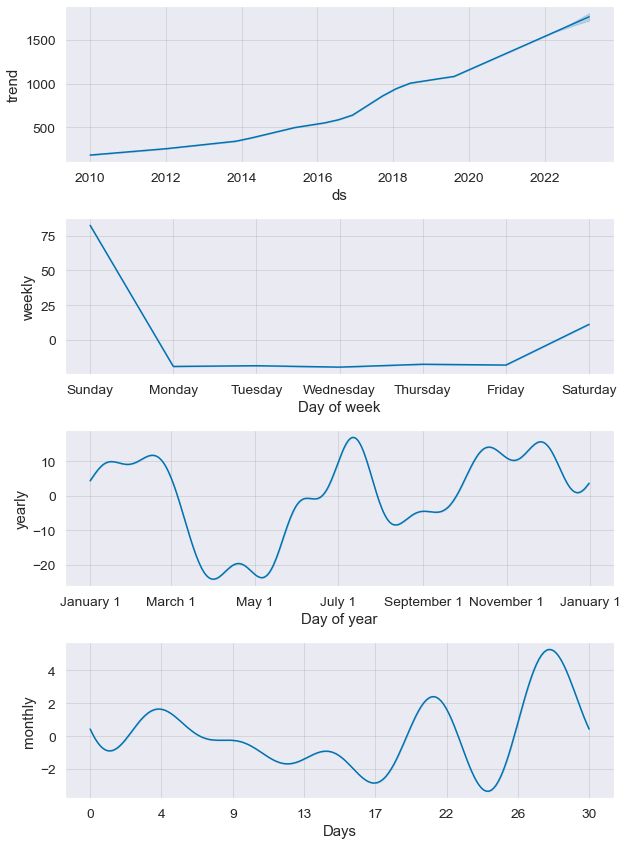

In [209]:
model1.plot_components(df5_pred);

In [210]:
%%time
## We create a merged DataFrame to examine the actuals v/s predicted values closely

selected_columns = ['ds', 'yhat_lower', 'yhat_upper', 'yhat']
df5_pred = df5_pred.loc[:, selected_columns].reset_index(drop=True)

## Using left join, we only select rows that are part of our test data set.
## This would exclude the predictions on holidays and weekends.



CPU times: total: 0 ns
Wall time: 2 ms


In [211]:
df5_pred

,ds,yhat_lower,yhat_upper,yhat
0,2010-01-04,78.715699,259.256352,170.593846
1,2010-01-05,82.149210,260.827764,171.723911
2,2010-01-06,83.181468,266.017138,170.954427
3,2010-01-07,82.436369,260.918337,172.968809
4,2010-01-08,89.676996,269.317736,172.601641
...,...,...,...,...
3381,2023-02-25,1678.088345,1892.280786,1783.139333
3382,2023-02-26,1759.518937,1963.162937,1856.148079
3383,2023-02-27,1652.160939,1854.744407,1754.140172
3384,2023-02-28,1653.459415,1852.716430,1752.249878


In [212]:

df5_test = df5_test.merge(df5_pred, on=['ds'], how='left')

In [213]:
df5_test

,ds,y,yhat_lower,yhat_upper,yhat
0,2022-01-03,1502.184082,1446.224254,1626.803707,1534.734554
1,2022-01-04,1510.981812,1453.408733,1620.783615,1534.309191
2,2022-01-05,1546.864502,1447.640214,1617.366931,1531.813943
3,2022-01-06,1522.053101,1444.677531,1629.011035,1533.634983
4,2022-01-07,1532.729004,1445.365450,1624.282517,1534.548843
...,...,...,...,...,...
139,2022-07-25,1396.599976,1535.509896,1725.200104,1634.540597
140,2022-07-26,1393.750000,1539.903571,1726.667845,1635.948563
141,2022-07-27,1404.400024,1549.819554,1733.449039,1636.344416
142,2022-07-28,1416.849976,1539.452670,1734.920916,1638.607949


In [214]:
df5_test['ds'] = pd.to_datetime(df5_test['ds'])

In [215]:
df5_test.set_index('ds', inplace=True)

In [216]:
df5

,ds,y
0,2010-01-04,155.755493
1,2010-01-05,155.892487
2,2010-01-06,155.997528
3,2010-01-07,156.403839
4,2010-01-08,156.609299
...,...,...
3100,2022-07-25,1396.599976
3101,2022-07-26,1393.750000
3102,2022-07-27,1404.400024
3103,2022-07-28,1416.849976


CPU times: total: 78.1 ms
Wall time: 89.8 ms


[Text(0.5, 1.0, 'Soy bean price - actual vs. predicted'),
 Text(0.5, 0, 'Date'),
 Text(0, 0.5, 'Price per bushel (US$)')]

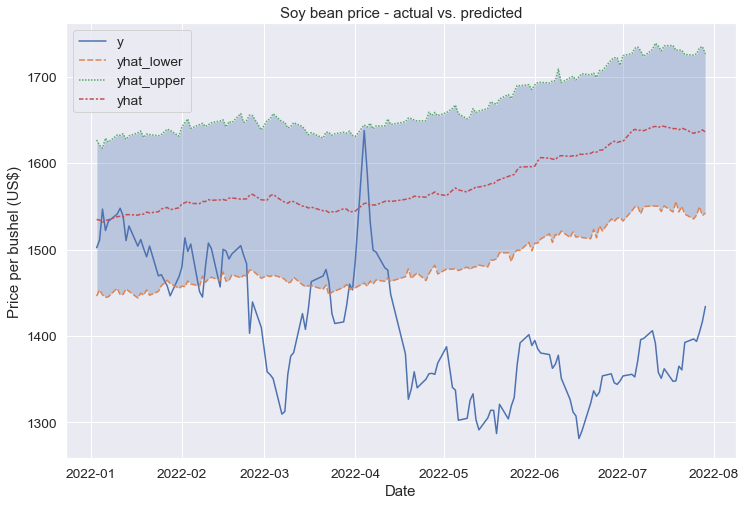

In [217]:
%%time

fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.lineplot(data=df5_test[['y', 'yhat_lower', 
                                 'yhat_upper', 'yhat']])
ax.fill_between(df5_test.index, df5_test.yhat_lower, 
                df5_test.yhat_upper, alpha=0.3)
ax.set(title='Soy bean price - actual vs. predicted', 
       xlabel='Date', ylabel='Price per bushel (US$)')

### Checking Stationarity

In [224]:
start6 = '2005-01-01'
end6 = '2021-06-10'
ticker6 = "HDFCBANK.NS"


In [225]:
df6 = yf.download(ticker6 , start6 , end6)
print(f"Downloaded {df.shape[0]} rows and {df.shape[1]} columns of {ticker6} data")

[*********************100%***********************]  1 of 1 completed
Downloaded 6404 rows and 6 columns of HDFCBANK.NS data


In [226]:
df6.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2005-01-03,51.605000,52.779999,51.605000,52.525002,46.382301,1295580
2005-01-04,52.505001,53.099998,50.500000,51.945000,45.870136,2238060
2005-01-05,52.000000,52.000000,48.700001,50.005001,44.157009,3987870
2005-01-06,50.005001,50.980000,47.900002,48.514999,42.841255,4829510
2005-01-07,48.799999,49.375000,48.450001,49.025002,43.291626,2649000


In [228]:
df6 = df6.drop(['Open' , 'High' , 'Low' , 'Close' , 'Volume'] ,axis =1)

In [229]:
df6.head()

,Adj Close
Date,
2005-01-03,46.382301
2005-01-04,45.870136
2005-01-05,44.157009
2005-01-06,42.841255
2005-01-07,43.291626


In [230]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as sms
from statsmodels.tsa.stattools import adfuller

<AxesSubplot:xlabel='Date'>

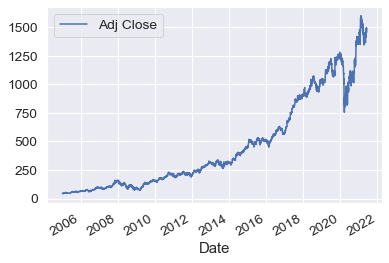

In [231]:
df6.plot()

In [232]:
def check_stationarity(y, wl1=21, wl2=252, lags=40, figsize=(15, 10)):
    """ Checks the stationarity of a pandas Series (default is daily prices or returns),
        using plots, correlograms and the ADF test
    """
    ## Calculating rolling statistics
    
    rolling_wl1_mean = y.rolling(window=wl1).mean()
    rolling_wl2_mean = y.rolling(window=wl2).mean()
    rolling_wl1_vol = y.rolling(window=wl1).std()
    rolling_wl2_vol = y.rolling(window=wl2).std()
    
    ## Plotting the price, rolling statistics and correlograms
    
    fig = plt.figure(figsize=figsize)
    sns.set(font_scale=1)
    layout = (2, 2)
    y_ax = plt.subplot2grid(layout, (0, 0))
    vol_ax = plt.subplot2grid(layout, (0, 1))
    acf_ax = plt.subplot2grid(layout, (1, 0))
    pacf_ax = plt.subplot2grid(layout, (1, 1))
        
    y.plot(ax=y_ax)
    rolling_wl1_mean.plot(ax=y_ax)
    rolling_wl2_mean.plot(ax=y_ax)
    
    rolling_wl1_vol.plot(ax=vol_ax)
    rolling_wl2_vol.plot(ax=vol_ax)
    y_ax.set_title('Rolling means over time')
    y_ax.legend(['observed', f'{wl1}-period MA of observed', f'{wl2}-period MA of observed'], loc='best')
    #y_ax.set_ylabel("Gold prices(in INR)/oz.")
    
    vol_ax.set_title('Rolling volatility over time')
    vol_ax.legend([f'{wl1}-period MA of volatility', f'{wl2}-period MA of volatility'], loc='best')
    
    sm.graphics.tsa.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
    sm.graphics.tsa.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)
    
    ## Running the Augmented Dickey-Fuller test
    print('--------------------------------------------------------------')
    print('--------- The augmented Dickey-Fuller test results -----------')
    print('--------------------------------------------------------------')
    adftest = adfuller(y, autolag='AIC')
    results = pd.Series(adftest[0:4], index=['Test Statistic','p-value','# of Lags','# of Observations'])
    for key,value in adftest[4].items():
        results[f'Critical Value ({key})'] = '{0:.3f}'.format(value)
    print(results)
    print('--------------------------------------------------------------')

--------------------------------------------------------------
--------- The augmented Dickey-Fuller test results -----------
--------------------------------------------------------------
Test Statistic          1.061992
p-value                 0.994879
# of Lags                   29.0
# of Observations         4024.0
Critical Value (1%)       -3.432
Critical Value (5%)       -2.862
Critical Value (10%)      -2.567
dtype: object
--------------------------------------------------------------


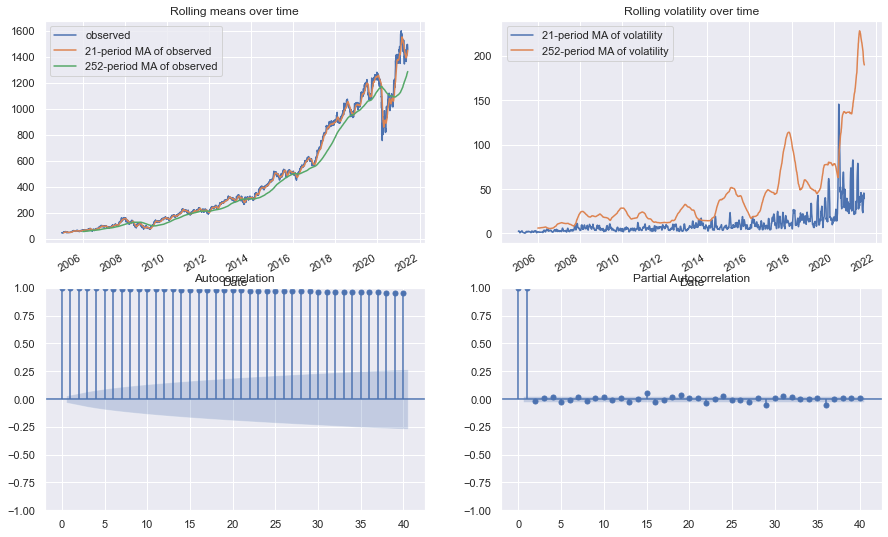

In [234]:
check_stationarity(df6['Adj Close'])

In [236]:
df6['log_returns'] = np.log(df6['Adj Close'] / df6['Adj Close'].shift(1))
df6.dropna(axis='rows', how='any', inplace=True)

In [237]:
df6

,Adj Close,log_returns
Date,,
2005-01-04,45.870136,-0.011104
2005-01-05,44.157009,-0.038063
2005-01-06,42.841255,-0.030250
2005-01-07,43.291626,0.010458
2005-01-10,43.247467,-0.001021
...,...,...
2021-06-03,1496.596436,0.010944
2021-06-04,1477.305176,-0.012974
2021-06-07,1476.222412,-0.000733


--------------------------------------------------------------
--------- The augmented Dickey-Fuller test results -----------
--------------------------------------------------------------
Test Statistic         -28.747512
p-value                       0.0
# of Lags                     5.0
# of Observations          4047.0
Critical Value (1%)        -3.432
Critical Value (5%)        -2.862
Critical Value (10%)       -2.567
dtype: object
--------------------------------------------------------------


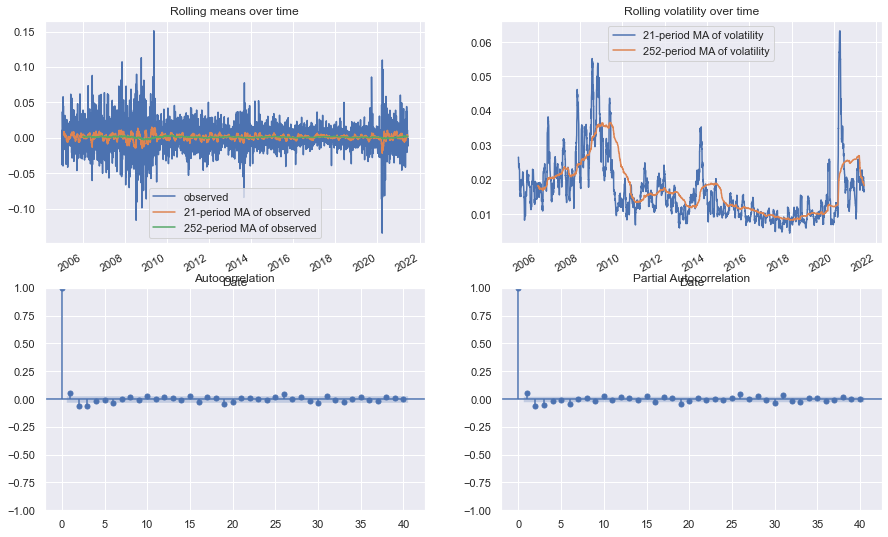

In [238]:
check_stationarity(df6['log_returns'])

In [245]:
df8 = df.copy()

In [246]:
df8.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-06-03,1508.000000,1524.949951,1487.750000,1520.550049,1496.596436,5143630
2021-06-04,1516.000000,1520.650024,1499.199951,1500.949951,1477.305176,4712238
2021-06-07,1510.000000,1514.000000,1496.000000,1499.849976,1476.222412,4045834
2021-06-08,1496.550049,1501.300049,1481.500000,1483.050049,1459.687256,4936270
2021-06-09,1483.900024,1502.000000,1472.050049,1480.300049,1456.980591,5111721


In [247]:
## Resampling to obtain weekly stock prices with the following rules
## 'Open': first opening price of the month
## 'High': max price of the month
## 'Low': min price of the month
## 'Close' and 'Adj Close': last closing price of the month

df8 = df8.resample('W').agg({'Open':'first', 'High':'max', 'Low': 'min', 
                             'Close':'last', 'Adj Close':'last'})

In [248]:
df8

,Open,High,Low,Close,Adj Close
Date,,,,,
1996-01-07,3.030000,3.030000,2.925000,2.960000,2.373917
1996-01-14,2.960000,2.950000,2.800000,2.825000,2.265648
1996-01-21,2.825000,2.815000,2.535000,2.555000,2.049108
1996-01-28,2.555000,2.600000,2.410000,2.435000,1.952867
1996-02-04,2.435000,2.995000,2.395000,2.915000,2.337828
...,...,...,...,...,...
2021-05-16,1427.000000,1430.000000,1382.349976,1386.849976,1365.002686
2021-05-23,1395.150024,1501.900024,1381.300049,1497.300049,1473.712646
2021-05-30,1503.250000,1520.449951,1462.449951,1503.449951,1479.765747


In [249]:
df8.drop(columns=["Open", "High", "Low", "Close"], inplace=True)
df8.rename(columns = {'Adj Close': 'adj_close'}, inplace=True)
print(df8.tail())

              adj_close
Date                   
2021-05-16  1365.002686
2021-05-23  1473.712646
2021-05-30  1479.765747
2021-06-06  1477.305176
2021-06-13  1456.980591


In [250]:
## Checking for null values

df8[df8['adj_close'].isnull()]

,adj_close
Date,


In [263]:
start8 = datetime.date(1995, 1, 1)
end8 = datetime.date(2021, 12, 31)
ticker8 = ticker6

In [264]:
start8_str = (start8 + pd.Timedelta("5 days")).strftime("%B %Y")
end8_str = (end8 - pd.Timedelta("5 days")).strftime("%B %Y")

<AxesSubplot:title={'center':'HDFCBANK.NS weekly adjusted close prices (January 1995 - December 2021)'}, xlabel='Date'>

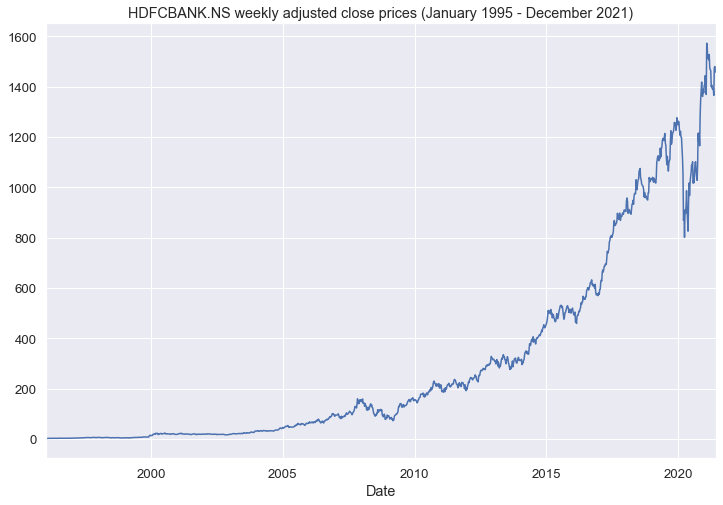

In [265]:
sns.set(font_scale=1.2)
df8['adj_close'].plot(figsize=(12, 8), title=f"{ticker8} weekly adjusted close prices ({start8_str} - {end8_str})")

--------------------------------------------------------------
--------- The augmented Dickey-Fuller test results -----------
--------------------------------------------------------------
Test Statistic          2.453832
p-value                 0.999033
# of Lags                   23.0
# of Observations         1304.0
Critical Value (1%)       -3.435
Critical Value (5%)       -2.864
Critical Value (10%)      -2.568
dtype: object
--------------------------------------------------------------
CPU times: total: 641 ms
Wall time: 526 ms


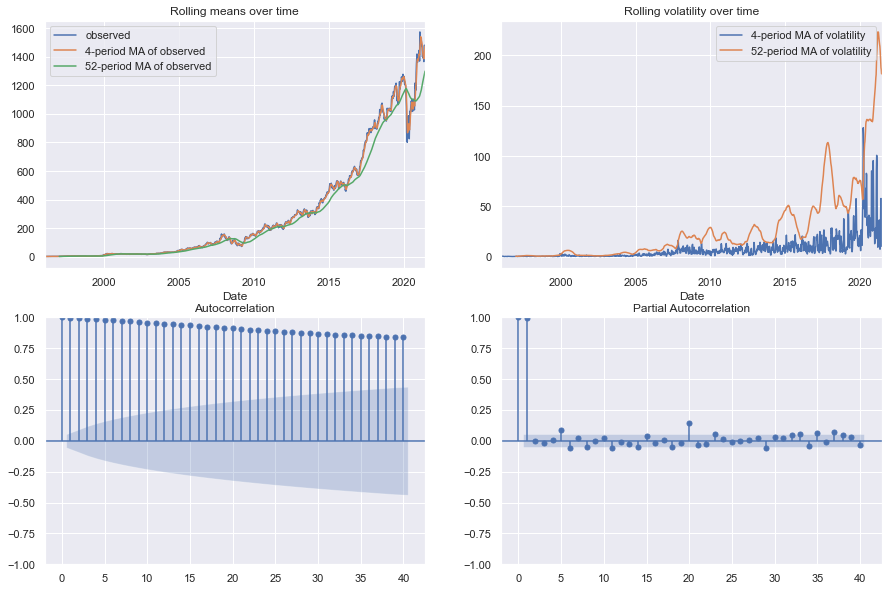

In [266]:
%%time

check_stationarity(df8['adj_close'], wl1=4, wl2=52)

Points to note:
- The p-value is nearly 1 (and equivalently the test statistic is greater than the critical values at all 3 significance levels). So the ADF test result is that the price series is non-stationary.
- The rolling means and volatility plots are time-varying. So we arrive at the same conclusion by examining the plots.
- From the ACF, there are significant autocorrelations above the 95% confidence interval at all lags. From the PACF, we have spikes at lags 1, 8, 9, 13, 18, 23 and 38.

In [267]:
df8['log_returns'] = np.log(df8['adj_close'] / df8['adj_close'].shift(1))
df8.dropna(axis='rows', how='any', inplace=True)

--------------------------------------------------------------
--------- The augmented Dickey-Fuller test results -----------
--------------------------------------------------------------
Test Statistic         -11.624875
p-value                       0.0
# of Lags                     9.0
# of Observations          1317.0
Critical Value (1%)        -3.435
Critical Value (5%)        -2.864
Critical Value (10%)       -2.568
dtype: object
--------------------------------------------------------------
CPU times: total: 594 ms
Wall time: 461 ms


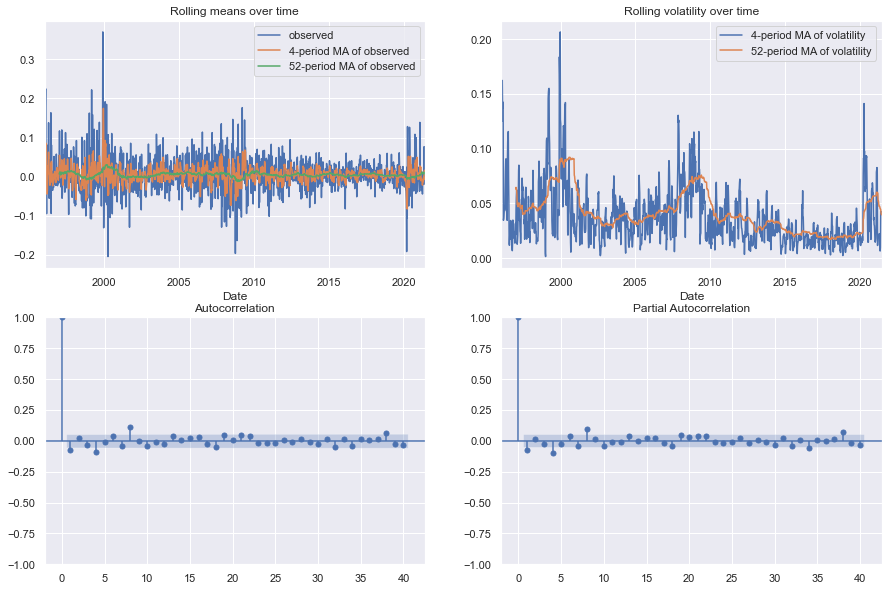

In [268]:
%%time

check_stationarity(df8['log_returns'], wl1=4, wl2=52)

Points to note:
- As per the ADF test results, the `HDFC Bank` returns are stationary since the p-value is almost 0 and the test statistic is less than all the critical values.
- The returns and rolling means of the returns are all centred around 0. As the time scale increases, the means become more and more constant. At shorter time scales, the noise tends to obscure the signal.
- The volatily is time-varying at both the faster and slower rolling levels.
- We can see bristles near or beyond the blue shadow at lags 17 and 26 in the ACF plot and lags 12, 16, 17, 18 and 26 in the PACF plot.
- **Returns are log price differences. So we can also infer from the above two checks, that the price series is integrated with order $1.$**

In [269]:
#Arima Model 

In [270]:

%%time
##########################################################
################ ARIMA model fitting #####################
##########################################################
import scipy.stats as scs
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

## Creating the ARIMA model class
## We select the order arbitrarily (p and q)
## We inferred d from the results of `check_stationarity`

## Defining the model by providing the training set and providing the parameters p, d, q
arima_model = ARIMA(df8['adj_close'], order=(3, 1, 2))

## Fitting the model, disp=0 is to switch off verbose display
arima_fit1 = arima_model.fit()

## Printing a summary of the model
arima_fit1.summary()


CPU times: total: 4.33 s
Wall time: 3.29 s


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              adj_close   No. Observations:                 1327
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -5488.048
Date:                Thu, 04 Aug 2022   AIC                          10988.096
Time:                        01:24:17   BIC                          11019.236
Sample:                    01-14-1996   HQIC                         10999.769
                         - 06-13-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.4657      0.012   -123.473      0.000      -1.489      -1.442
ar.L2         -0.8386      0.019    -43.512      0.000      -0.876      -0.801
ar.L3          0.0862      0.012      7.077      0.000       0.062       0.110
ma.L1          1.4939      0.005    323.010      0.000       1.485       1.503
ma.L2          0.9829      0.005    184.937      0.000       0.972       0.993
sigma2       230.0745      2.526     91.086      0.000     225.124     235.025
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             82680.19
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):             777.13   Skew:                             1.09
Prob(H) (two-sided):                  0.00   Kurtosis:                        41.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [271]:
# Points to note:

# We chose an  𝐴𝑅𝐼𝑀𝐴(3,1,2)  model to fit the price series of Netflix. Equivalently, we could have fit an  𝐴𝑅𝐼𝑀𝐴(3,0,2)  to the returns instead.
# The summary() method provides the results of the model fitting exercise on the in-sample data set (a.k.a. the training data).
# The most important part is the table at the centre which has the coefficient values, their 95% confidence intervals and their corresponding p-values.
# However, we also need to run model diagnostics by examining the residual errors closely. This will tell us if our model was a good fit to the underlying data.

In [272]:

def arima_diagnostics(resids_, figsize=(15, 9), n_lags=40):
    '''
    Diagnoses the fit of an ARIMA model by examining its residuals.
    Returns a chart with with multiple plots
    '''
    # Creating placeholder subplots
    M = 2
    N = 2
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(M, N, figsize=figsize)

    r = resids_
    resids_ = (r - np.nanmean(r)) / np.nanstd(r)
    resids_nonmissing = resids_[~(np.isnan(resids_))]
    
    # Plotting residuals over time
    sns.lineplot(x=np.arange(len(resids_)), 
                 y=resids_, ax=ax1)
    ax1.set_title('Standardized residuals')

    # Plotting the distribution of residuals
    x_lim = (-1.96 * 2, 1.96 * 2)
    r_range = np.linspace(x_lim[0], x_lim[1])
    norm_pdf = scs.norm.pdf(r_range)
    
    sns.distplot(resids_nonmissing, hist=True, kde=True, 
                 norm_hist=True, ax=ax2)
    ax2.plot(r_range, norm_pdf, color='green', linewidth=2, label='N(0,1)')
    ax2.set_title('Distribution of standardized residuals')
    ax2.set_xlim(x_lim)
    ax2.legend()
        
    # Q-Q plot
    qq = sm.qqplot(resids_nonmissing, line='s', ax=ax3)
    ## 's' is for standardized line to compare the plot with a normal distribution
    ax3.set_title('Q-Q plot')

    # ACF plot
    sm.graphics.tsa.plot_acf(resids_, lags=n_lags, ax=ax4, alpha=0.05)
    ax4.set_title('ACF plot')

    return fig

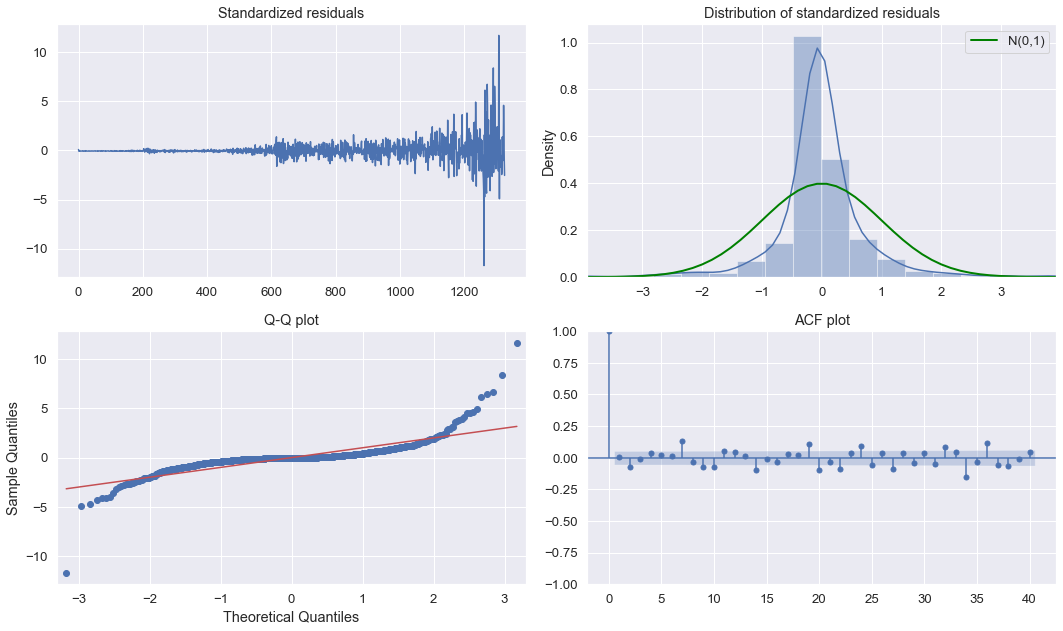

CPU times: total: 2.34 s
Wall time: 2.93 s


In [273]:

%%time
sns.set(font_scale=1.2)
arima_diagnostics(arima_fit1.resid)
plt.tight_layout()
plt.show();

In [274]:
# Points to note:

# Standardized residuals: The mean of the residuals is approximately zero. However, it's variance is much higher in the second half of the series.
# Distribution of standardized residuals and Q-Q plot: Both plots indicate fatter tails compared to a normal distribution.
# ACF plot: There seems to be serial correlations at lags 8, 13, 14, 22 and a few more.
# If the fit is good, we should see residuals similar to Gaussian white noise. It's not so here.
# So we can infer that the model is not a very good fit.

In [275]:
# Statistical tests we additionally run
# To check for autocorrelations in residuals: The Ljung-Box test
# The null hypothesis is that the serial correlations of the time series are zero. We use it in addition to visual interpretation of ACF/PACF plots.

# To check for normality in residuals: The Jarque-Bera test
# The null hypothesis is that the time series is normally distributed. We use it in addition to visual interpretation of plots like the residual distribution and the Q-Q plots.

[Text(0.5, 1.0, 'Ljung-Box test results (after modeling HDFCBANK.NS stock prices)'),
 Text(0.5, 0, 'Lags'),
 Text(0, 0.5, 'p-value')]

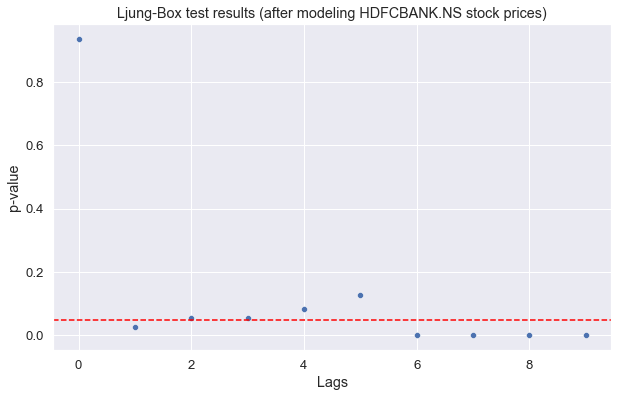

In [276]:
## Running the Ljung-Box test and plotting the results

ljung_box_results = sm.stats.acorr_ljungbox(arima_fit1.resid)
fig, ax = plt.subplots(1, figsize=(10, 6))
sns.scatterplot(x=range(len(ljung_box_results)), y=ljung_box_results['lb_pvalue'], ax=ax)
ax.axhline(0.05, ls='--', color='red')
ax.set(title=f"Ljung-Box test results (after modeling {ticker8} stock prices)", xlabel='Lags', ylabel='p-value')

In [278]:
# Points to note:

# There are no significant serial correlations until lag 12.
# However, many of the correlations from lag 13 are below the red line.
# So our model is not a good fit.

In [279]:
## Running the Jarque-Bera test and interpreting its results

from statsmodels.stats.stattools import jarque_bera

jb_test_stat, pvalue, _, _ = jarque_bera(arima_fit1.resid)
print(f"Jarque-Bera statistic: {jb_test_stat:.2f} with p-value: {pvalue:.2f}")

if pvalue < 0.05:
    print("Our residuals are likely not normally distributed.")
else:
    print("Our residuals are likely normally distributed.")


Jarque-Bera statistic: 82873.39 with p-value: 0.00
Our residuals are likely not normally distributed.


In [280]:
%%time

# best_aic = np.inf
# best_order = None
# best_mdl = None

# pq_rng = range(5)
# d_rng = range(2)
# for i in pq_rng:
#     for d in d_rng:
#         for j in pq_rng:
#             try:
#                 tmp_mdl = ARIMA(df8['adj_close'], order=(i, d, j)).fit(method='mle', trend='nc')
#                 tmp_aic = tmp_mdl.aic
#                 if tmp_aic < best_aic:
#                     best_aic = tmp_aic
#                     best_order = (i, d, j)
#                     best_mdl = tmp_mdl
#             except:
#                 continue
            
# print("aic : ",best_aic, "| order : ",best_order)

CPU times: total: 0 ns
Wall time: 0 ns


In [281]:
# Automatically finding the best ARIMA fit (using the pmdarima library

In [282]:
%%time

import pmdarima as pm

## Fitting the model (This is the default setting)
arima_fit2 = pm.auto_arima(df8['adj_close'], error_action='ignore', 
                           suppress_warnings=True, seasonal=False)

CPU times: total: 31.8 s
Wall time: 24.5 s


In [283]:
## Printing a summary of the model
arima_fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1327
Model:               SARIMAX(5, 2, 0)   Log Likelihood               -5639.012
Date:                Thu, 04 Aug 2022   AIC                          11290.024
Time:                        01:28:28   BIC                          11321.159
Sample:                             0   HQIC                         11301.695
                               - 1327                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8952      0.011    -84.445      0.000      -0.916      -0.874
ar.L2         -0.6680      0.011    -58.284      0.000      -0.690      -0.646
ar.L3         -0.5406      0.013    -42.044      0.000      -0.566      -0.515
ar.L4         -0.3869      0.013    -28.984      0.000      -0.413      -0.361
ar.L5         -0.0665      0.011     -6.100      0.000      -0.088      -0.045
sigma2       290.8799      2.757    105.522      0.000     285.477     296.283
===================================================================================
Ljung-Box (L1) (Q):                   0.52   Jarque-Bera (JB):             71039.44
Prob(Q):                              0.47   Prob(JB):                         0.00
Heteroskedasticity (H):            1096.13   Skew:                             1.78
Prob(H) (two-sided):                  0.00   Kurtosis:                        38.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [284]:
%%time

## Fitting the model(With more tuning of the parameters)
arima_fit3 = pm.auto_arima(df8['adj_close'], error_action='ignore', 
                           suppress_warnings=True, stepwise=False, 
                           approximation=False, seasonal=False)

arima_fit3.summary()

CPU times: total: 1min 3s
Wall time: 50.9 s


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1327
Model:               SARIMAX(5, 2, 0)   Log Likelihood               -5639.011
Date:                Thu, 04 Aug 2022   AIC                          11292.022
Time:                        01:31:21   BIC                          11328.346
Sample:                             0   HQIC                         11305.638
                               - 1327                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0224      0.505      0.044      0.965      -0.968       1.013
ar.L1         -0.8952      0.011    -83.514      0.000      -0.916      -0.874
ar.L2         -0.6680      0.011    -58.231      0.000      -0.690      -0.645
ar.L3         -0.5406      0.013    -41.829      0.000      -0.566      -0.515
ar.L4         -0.3869      0.013    -28.947      0.000      -0.413      -0.361
ar.L5         -0.0665      0.011     -6.100      0.000      -0.088      -0.045
sigma2       290.8794      2.836    102.575      0.000     285.321     296.437
===================================================================================
Ljung-Box (L1) (Q):                   0.52   Jarque-Bera (JB):             71039.04
Prob(Q):                              0.47   Prob(JB):                         0.00
Heteroskedasticity (H):            1095.44   Skew:                             1.78
Prob(H) (two-sided):                  0.00   Kurtosis:                        38.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [285]:
# Points to note:

# The most suitable model is  𝐴𝑅𝐼𝑀𝐴(2,1,2) 
# Our guiding principle when we build models is Occam's Razor i.e. we want a model with the fewest parameters that can explain our time series process.
# We therefore use information criterion (Akaike Information Criterion).
# When choosing from multiple competing models, we choose the one which has the smallest AIC.
# The idea is to find the right balance between underfitting and overfitting. AIC helps us find that.

In [286]:
#### Forecasting using the ARIMA class

# We will forecast using both, $ARIMA(3, 1, 2)$ and $ARIMA(2, 1, 2)$. 

In [287]:
start9 = datetime.date(2019, 6, 30)
end9 = datetime.date(2020, 7, 7)
ticker9 = ticker8

In [288]:
df = yf.download(ticker9, start=start9, end=end9, progress=False)
print(f"Downloaded {df.shape[0]} rows and {df.shape[1]} columns of {ticker9} data")

Downloaded 249 rows and 6 columns of HDFCBANK.NS data


In [289]:
df9 = df.copy()

In [290]:
## Resampling to obtain weekly stock prices with the following rules
## 'Open': first opening price of the month
## 'High': max price of the month
## 'Low': min price of the month
## 'Close' and 'Adj Close': last closing price of the month

df9 = df9.resample('W').agg({'Open':'first', 'High':'max', 'Low': 'min', 
                             'Close':'last', 'Adj Close':'last'})

In [291]:
df9.drop(columns=["Open", "High", "Low", "Close"], inplace=True)
df9.rename(columns = {'Adj Close': 'adj_close'}, inplace=True)
print(df9.tail())

              adj_close
Date                   
2020-06-14   967.268555
2020-06-21  1017.071350
2020-06-28  1039.807495
2020-07-05  1057.031860
2020-07-12  1085.624146


In [292]:
## Checking for null values

df9[df9['adj_close'].isnull()]

,adj_close
Date,


In [293]:
%%time

## Forecasting using the first model, ARIMA(3, 1, 2)

n_fcast1 = len(df9)
arima_fcast1 = arima_fit1.forecast(n_fcast1)

CPU times: total: 31.2 ms
Wall time: 47.7 ms


In [294]:
type(arima_fcast1)

pandas.core.series.Series

In [296]:
%%time

# arima_fcast1 = [pd.DataFrame(arima_fcast1[0], columns=['forecast']), 
#                 pd.DataFrame(arima_fcast1[2], columns=['lower_95', 
#                                                        'upper_95'])]

# arima_fcast1 = pd.concat(arima_fcast1, axis=1).set_index(df9.index)

CPU times: total: 0 ns
Wall time: 0 ns


In [297]:
arima_fcast3 = arima_fit3.predict(n_periods=n_fcast1, 
                                  return_conf_int=True, alpha=0.05)

In [299]:
%%time

arima_fcast3 = [pd.DataFrame(arima_fcast3[0], columns=['prediction']), 
                pd.DataFrame(arima_fcast3[1], columns=['lower_95', 
                                                       'upper_95'])]

arima_fcast3 = pd.concat(arima_fcast3, axis=1).set_index(df9.index)

CPU times: total: 0 ns
Wall time: 1.99 ms


In [304]:
arima_fcast3.lower_95

Date
2019-07-07    1429.724242
2019-07-14    1443.012341
2019-07-21    1436.502856
2019-07-28    1424.611369
2019-08-04    1407.158060
2019-08-11    1391.568435
2019-08-18    1380.622116
2019-08-25    1364.882692
2019-09-01    1346.398514
2019-09-08    1325.709015
2019-09-15    1304.987507
2019-09-22    1284.494139
2019-09-29    1262.241531
2019-10-06    1238.460760
2019-10-13    1213.411831
2019-10-20    1187.696739
2019-10-27    1161.350509
2019-11-03    1133.944883
2019-11-10    1105.492818
2019-11-17    1076.091081
2019-11-24    1045.909836
2019-12-01    1014.966460
2019-12-08     983.173989
2019-12-15     950.534640
2019-12-22     917.085759
2019-12-29     882.881024
2020-01-05     847.934391
2020-01-12     812.234470
2020-01-19     775.787870
2020-01-26     738.612416
2020-02-02     700.729591
2020-02-09     662.150574
2020-02-16     622.879913
2020-02-23     582.925604
2020-03-01     542.298716
2020-03-08     501.011028
2020-03-15     459.071529
2020-03-22     416.487289
2020-03

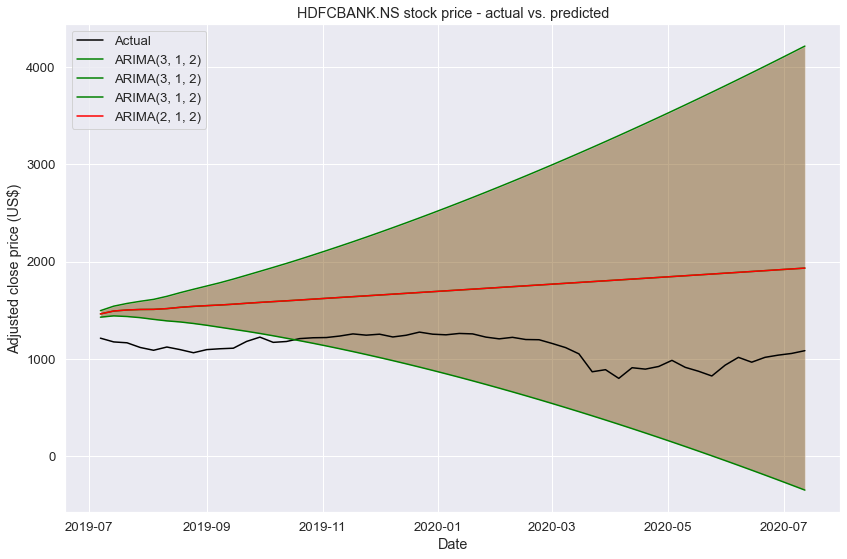

CPU times: total: 688 ms
Wall time: 688 ms


In [311]:
%%time

## Plotting the results for both models

fig, ax = plt.subplots(1, figsize=(12, 8))

ax = sns.lineplot(data=df9['adj_close'], color='black', label='Actual')

ax.plot(arima_fcast3, color='green', label='ARIMA(3, 1, 2)')

ax.fill_between(arima_fcast3.index, arima_fcast3.lower_95, 
                arima_fcast3.upper_95, alpha=0.3, 
                facecolor='green')

ax.plot(arima_fcast3.prediction, color='red', label='ARIMA(2, 1, 2)')

ax.fill_between(arima_fcast3.index, arima_fcast3.lower_95, 
                arima_fcast3.upper_95, alpha=0.2, 
                facecolor='red')

ax.set(title=f"{ticker8} stock price - actual vs. predicted", xlabel='Date',
       ylabel='Adjusted close price (US$)')
ax.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('images/ch3_im25.png')
plt.show()


## A brief look at modeling volatility using the ARCH/GARCH family of models

The ARIMA class of models is widely used in asset price forecasting. However, as we have seen, time-varying volatility and volatility clustering (heteroskedasticity) are recurrent themes in finance. The ARMA/ARIMA models do not account for it. Fortunately, we have the ARCH/GARCH method which allows us to model for the time-dependent change in the volatility of a time-series.

The $ARIMA + GARCH$ combination is used to improve forecasts. In practice, we jointly estimate the mean returns and the volatility associated with the returns.

We model conditional variance in Python with the `arch` library.

## Autoregressive Conditionally Heteroskedastic Models (ARCH)

If we observe the name of the model, we can make a pretty good guess what it does. It estimates the conditional variance($\sigma_t$ in the below setup) over time based on the past values of the variance (hence the name autoregressive). We now consider the $ARCH(1)$ model below which can be easily generalized to $ARCH(q)$.

$$r_t = \mu + \epsilon_t$$ Above, we express returns as a (multiplicative) combination of deterministic and stochastic components.
$$\epsilon_t = \sigma_t w_t$$ Carrying on from the previous step, we express the stochastic component as a combination of Gaussian white noise $w_t$ and the conditional standard deviation $\sigma_t$.
<div class="alert alert-success">$$\sigma_{t}^2 = \alpha_0 + \alpha_1 \epsilon_{t-1}^2$$</div> 

***This is the ARCH model where $\alpha_0$ and $\alpha_1$ are its parameters.***

It is useful to think of $ARCH(q)$ as the application of $AR(p)$ to the variance of a time series process.

In [327]:
start10 = datetime.date(2010, 1, 1)
end10 = datetime.date(2022, 6, 30)
ticker10 = "HDFCBANK.NS"

In [328]:
df = yf.download(ticker10, start=start10, end=end10, progress=False)
print(f"Downloaded {df.shape[0]} rows and {df.shape[1]} columns of {ticker10} data")

Downloaded 3083 rows and 6 columns of HDFCBANK.NS data


In [329]:
df10 = df.copy()

In [330]:
df10.drop(columns=["Open", "High", "Low", "Close", "Volume"], inplace=True)
df10.rename(columns = {'Adj Close': 'adj_close'}, inplace=True)
print(df10.tail())

simple_perc_returns = 100 * df10['adj_close'].pct_change().dropna()

              adj_close
Date                   
2022-06-23  1335.150024
2022-06-24  1353.800049
2022-06-27  1356.250000
2022-06-28  1345.900024
2022-06-29  1343.949951


<AxesSubplot:title={'center':'Daily percentage returns of HDFCBANK.NS: 2010-01-01 to 2022-06-30'}, xlabel='Date'>

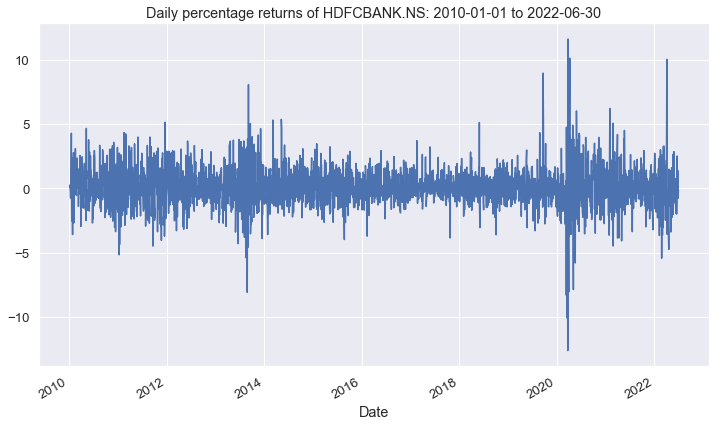

In [331]:
simple_perc_returns.plot(title=f'Daily percentage returns of {ticker10}: {start10} to {end10}', figsize=(12, 7))

In [332]:
import arch

# Specifying an ARCH(1) model 
arch_model1 = arch.arch_model(simple_perc_returns, vol='ARCH', mean="Zero", p=1, o=0, q=0)

# Estimating the model
arch_model1_fitted = arch_model1.fit()

# Printing the summary
print(arch_model1_fitted.summary())

Iteration:      1,   Func. Count:      4,   Neg. LLF: 7657.027106787253
Iteration:      2,   Func. Count:     10,   Neg. LLF: 5648.283334762369
Iteration:      3,   Func. Count:     15,   Neg. LLF: 5589.018066492644
Iteration:      4,   Func. Count:     17,   Neg. LLF: 5589.018066492318
Optimization terminated successfully    (Exit mode 0)
            Current function value: 5589.018066492644
            Iterations: 4
            Function evaluations: 17
            Gradient evaluations: 4
                        Zero Mean - ARCH Model Results                        
Dep. Variable:              adj_close   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -5589.02
Distribution:                  Normal   AIC:                           11182.0
Method:            Maximum Likelihood   BIC:                           11194.1
                               

In [333]:
# one-period out-of-sample forecast
arch_model1_forecast = arch_model1_fitted.forecast(horizon=1)
print(arch_model1_forecast.mean['h.1'].iloc[-1])

0.0


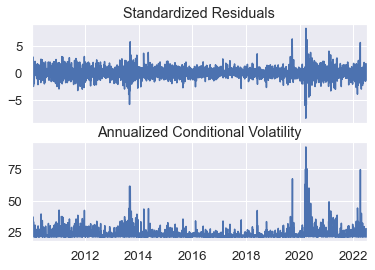

In [334]:
arch_model1_fitted.plot(annualize='D');

In [335]:
# Specifying a GARCH(1, 1) model 
garch_model1 = arch.arch_model(simple_perc_returns, vol='GARCH', mean="Zero", p=1, o=0, q=1)

# Estimating the model
garch_model1_fitted = garch_model1.fit()

# Printing the summary
print(garch_model1_fitted.summary())

Iteration:      1,   Func. Count:      5,   Neg. LLF: 1712354153.3468757
Iteration:      2,   Func. Count:     12,   Neg. LLF: 7026.402609743462
Iteration:      3,   Func. Count:     19,   Neg. LLF: 5346.091316573508
Iteration:      4,   Func. Count:     24,   Neg. LLF: 5337.257192376226
Iteration:      5,   Func. Count:     29,   Neg. LLF: 5319.702050528067
Iteration:      6,   Func. Count:     34,   Neg. LLF: 5318.540364686064
Iteration:      7,   Func. Count:     38,   Neg. LLF: 5318.539476937309
Iteration:      8,   Func. Count:     42,   Neg. LLF: 5318.539466099268
Iteration:      9,   Func. Count:     45,   Neg. LLF: 5318.539466100794
Optimization terminated successfully    (Exit mode 0)
            Current function value: 5318.539466099268
            Iterations: 9
            Function evaluations: 45
            Gradient evaluations: 9
                       Zero Mean - GARCH Model Results                        
Dep. Variable:              adj_close   R-squared:               

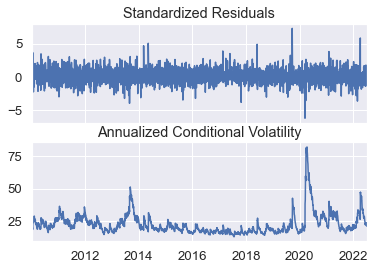

In [336]:
garch_model1_fitted.plot(annualize='D');

In [352]:
%%time

import pmdarima as pm

## fitting ARIMA on adjusted close prices
arima_fit_10 = pm.auto_arima(df10['adj_close'], error_action='ignore', 
                           suppress_warnings=True, seasonal=False)

p, d, q = arima_fit_10.order
print(p, d, q)
arima_fit_residuals = arima_fit_10.arima_res_.resid

# fitting a GARCH(1,1) model after fitting ARIMA on the prices
garch_model_2 = arch.arch_model(arima_fit_residuals, p=1, o=0, q=1)
garch_model2_fitted = garch_model_2.fit()

# Using ARIMA to predict prices
predicted_prices = arima_fit_10.predict(n_periods=1)[0]

# Using GARCH to predict the residuals
garch_model_2_forecast = garch_model2_fitted.forecast(horizon=1)
predicted_residual = garch_model_2_forecast.mean['h.1'].iloc[-1]
# Combining both models
predicted_price_range = (predicted_prices-2* predicted_residual, predicted_prices+2*predicted_residual)

print(predicted_price_range)

4 1 2
Iteration:      1,   Func. Count:      6,   Neg. LLF: 2885107.72298937
Iteration:      2,   Func. Count:     12,   Neg. LLF: 13983.423145850695
Iteration:      3,   Func. Count:     19,   Neg. LLF: 10724.207890517246
Iteration:      4,   Func. Count:     24,   Neg. LLF: 15794.998104376913
Iteration:      5,   Func. Count:     30,   Neg. LLF: 14315.018543651027
Iteration:      6,   Func. Count:     36,   Neg. LLF: 10676.016754603432
Iteration:      7,   Func. Count:     41,   Neg. LLF: 10675.58362874858
Iteration:      8,   Func. Count:     46,   Neg. LLF: 10675.553819878962
Iteration:      9,   Func. Count:     51,   Neg. LLF: 10675.551515293417
Iteration:     10,   Func. Count:     56,   Neg. LLF: 10697.761694886824
Optimization terminated successfully    (Exit mode 0)
            Current function value: 10675.551514883935
            Iterations: 11
            Function evaluations: 60
            Gradient evaluations: 10
(1346.9312821068852, 1346.6409782272494)
CPU times: total

In [353]:
start10 = datetime.date(2022, 6, 30)
end10 = datetime.date(2022, 7, 10)
ticker10 = "HDFCBANK.NS"

In [354]:
df = yf.download(ticker10, start=start10, end=end10, progress=False)
print(f"Downloaded {df.shape[0]} rows and {df.shape[1]} columns of {ticker10} data")

Downloaded 7 rows and 6 columns of HDFCBANK.NS data


In [355]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-06-30,1336.000000,1354.000000,1336.000000,1348.000000,1348.000000,6237911
2022-07-01,1343.949951,1360.000000,1330.050049,1353.750000,1353.750000,5736226
2022-07-04,1353.699951,1360.199951,1342.250000,1355.650024,1355.650024,4243740
2022-07-05,1364.000000,1379.349976,1348.300049,1352.599976,1352.599976,7162859
2022-07-06,1348.000000,1373.400024,1347.099976,1371.250000,1371.250000,7524539


In [365]:
def Stock_pred(ticker, date):
    start10 = datetime.date(2005, 1, 1)
    end10 = datetime.date(2022, 6, 30)
    
    df10 = yf.download(ticker, start=start10, end=end10, progress=False)
    
    df10.drop(columns=["Open", "High", "Low", "Close", "Volume"], inplace=True)
    df10.rename(columns = {'Adj Close': 'adj_close'}, inplace=True)
#     print(df10.tail())

    df10['return'] = 100 * df10['adj_close'].pct_change().dropna()
    import pmdarima as pm

## fitting ARIMA on adjusted close prices
    arima_fit_10 = pm.auto_arima(df10['adj_close'], error_action='ignore', 
                           suppress_warnings=True, seasonal=False)

    p, d, q = arima_fit_10.order
#     print(p, d, q)
    arima_fit_residuals = arima_fit_10.arima_res_.resid
    
# fitting a GARCH(1,1) model after fitting ARIMA on the prices
    garch_model_2 = arch.arch_model(arima_fit_residuals, p=1, o=0, q=1)
    garch_model2_fitted = garch_model_2.fit()

# Using ARIMA to predict prices
    predicted_prices = arima_fit_10.predict(n_periods=1)[0]

# Using GARCH to predict the residuals
    garch_model_2_forecast = garch_model2_fitted.forecast(horizon=1)
    predicted_residual = garch_model_2_forecast.mean['h.1'].iloc[-1]
# Combining both models
    predicted_price_range = (predicted_prices-2* predicted_residual, predicted_prices+2*predicted_residual)
    
    df_ = yf.download(ticker , date)
    act_price = df_.iloc[0]['Adj Close']
#     print(predicted_price_range)
    pct_ch1 = abs(predicted_prices-2* predicted_residual - act_price)
    pct_ch2 = abs(predicted_prices+2* predicted_residual - act_price)
    
    pt = (min(pct_ch1, pct_ch2)/act_price )*100
    return pt
    print('RME' , pt , '%')
    

In [366]:
date = datetime.date(2022,7,1)
Stock_pred('HDFCBANK.NS' , date)

4 1 3
Iteration:      1,   Func. Count:      6,   Neg. LLF: 107395838364.61191
Iteration:      2,   Func. Count:     13,   Neg. LLF: 29995038540.644745
Iteration:      3,   Func. Count:     20,   Neg. LLF: 13924.011878579511
Iteration:      4,   Func. Count:     26,   Neg. LLF: 13587.363535592862
Iteration:      5,   Func. Count:     31,   Neg. LLF: 13767.096331940424
Iteration:      6,   Func. Count:     38,   Neg. LLF: 17681.666593735514
Iteration:      7,   Func. Count:     44,   Neg. LLF: 13404.8146613834
Iteration:      8,   Func. Count:     49,   Neg. LLF: 13385.228268843832
Iteration:      9,   Func. Count:     54,   Neg. LLF: 13370.651540752151
Iteration:     10,   Func. Count:     59,   Neg. LLF: 13364.61719528205
Iteration:     11,   Func. Count:     64,   Neg. LLF: 13372.06364036041
Iteration:     12,   Func. Count:     70,   Neg. LLF: 13347.391993516114
Iteration:     13,   Func. Count:     75,   Neg. LLF: 13346.032115659165
Iteration:     14,   Func. Count:     80,   Neg. 

In [358]:
ticker = 'HDFCBANK.NS'
df_ = yf.download(ticker , date)


[*********************100%***********************]  1 of 1 completed


In [364]:
df_.iloc[0]['Adj Close']

1353.75

In [367]:
100 - 0.628332103744036 

99.37166789625596